## Exercise 1
By: Bethany Bailey

__Consider the problem of the owner of an oil field. The owner has B barrels of oil. She can
sell these barrels at price $p_t$ at time t. Her objective is to maximize the discounted present
value of sales of oil - we’ll assume there are no extraction costs. The owner discounts the
future at a rate given by $\frac{1}{1+r}$ (where r is the real interest rate and assumed to be constant). Answer the following:__

__1. What are the state variables?__: These are the variables we need to know to make a decision. In this problem, we need to know the amount of oil the owner starts with, $B$ and price $p_t$.

__2. What are the control variables?__: $s_t$ (barrels of oil to sell today).

__3. What does the transition equation look like?__: $b_{t+1} = b_t - s_t$

__4. Write down the sequence problem of the owner. Write down the Bellman equation.__:

Sequence Problem: $max_{\{s_t\}} \sum_{t=1}^{\infty} \frac{p_{t}s_{t}}{(1+r)^{t-1}}$ s.t. $\sum_{t=1}^{\infty} s_t = B$

Bellman Equation: $ V(b) = max{(ps+\frac{1}{1+r}V(b'))}$

__5. What does the owner’s Euler equation like?__: $p_t = \frac{p_{t+1}}{1+r}$

__6. What would the solution of the problem look like if $p_{t+1} = p_{t}$ for all t?__ The owner will sell everything today (in period t), that is, $s_t = B$. This is because she gets the payoff for every unit sold today or in the future, but she discounts the future, so she will sell it all as soon as possible.

__What would the solution look like if $p_{t+1} > (1 + r)p_{t}$ for all t?__ In this case, $s_t$ would be equal to zero, and the owner would always hold the oil until tomorrow.

__What is the condition on the path of prices necessary for an interior solution (where the owner will extract some, but not all, of the oil)?__: $p_t =\frac{p_{t+1}}{1+r}$

## Exercise 2

__1. State variables:__ capital stock today, $k_t$, and shock today, $z_t$.

__2. Control variables:__ consumption ($c_t$) and investment ($i_t$).

__3. Bellman equation:__ $V(k_t, z_t) = {max}_{c_t}\{E_{0}c_t + \beta E_{z_{t+1}|z_t} V(k_{t+1},z_{t+1}) \} $

__4. Solve the growth model given the following parameterization (you may use VFI or PFI):__

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Set parameters
gamma = 0.5
beta = 0.96
delta = 0.05
alpha = 0.4
sigma_z = 0.2
mu = 0
rho = 0

In [3]:
# Using Prof. DeBacker's code (modified), create grid spaces.

'''
------------------------------------------------------------------------
Create Grid for State Space    
------------------------------------------------------------------------
lb_k      = scalar, lower bound of cake grid
ub_k      = scalar, upper bound of cake grid 
size_k    = integer, number of grid points in cake state space
k_grid    = vector, size_w x 1 vector of cake grid points 
------------------------------------------------------------------------
'''
lb_k = 10
ub_k = 13 
size_k = 40  # Number of grid points
size_z = 40
k_grid = np.linspace(lb_k, ub_k, size_k)

import ar1_approx as ar1
ln_z_grid, pi_t = ar1.addacooper(size_z, mu, rho, sigma_z)
z_grid = np.exp(ln_z_grid)
pi = np.transpose(pi_t)

In [6]:
'''
------------------------------------------------------------------------
Create grid of current utility values    
------------------------------------------------------------------------
C        = matrix, current consumption (c=w-w')
U        = matrix, current period utility value for all possible
           choices of w and w' (rows are w, columns w')
------------------------------------------------------------------------
'''
C = np.zeros((size_k, size_k, size_k)) 
for i in range(size_k):
    for j in range(size_k):
        for q in range(size_k):
            C[i, j, q] = z_grid[q] * k_grid[i] ** alpha + (1 - delta) * k_grid[i] - k_grid[j]

C[C<=0] = 1e-15
if gamma == 1:
    U = np.log(C)
else:
    U = (C ** (1 - gamma)) / (1 - gamma)
U[C<0] = -9999999



In [7]:
## Continue to VFI
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol     = scalar, tolerance required for value function to converge
VFdist    = scalar, distance between last two value functions
VFmaxiter = integer, maximum number of iterations for value function
V         = vector, the value functions at each iteration
Vmat      = matrix, the value for each possible combination of w and w'
Vstore    = matrix, stores V at each iteration 
VFiter    = integer, current iteration number
TV        = vector, the value function after applying the Bellman operator
PF        = vector, indicies of choices of w' for all w 
VF        = vector, the "true" value function
------------------------------------------------------------------------
'''
VFtol = 1e-8 
VFdist = 7.0 
VFmaxiter = 3000 
V = np.zeros((size_k, size_k))
TV = np.zeros((size_k, size_k))
PF_discrete = np.zeros((size_k, size_k))
Vmat = np.zeros((size_k, size_k, size_z))
Vstore = np.zeros((size_k, size_k, VFmaxiter))
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:
    print("At iteration:", VFiter, "distance:", VFdist)
    for i in range(size_k):
        for j in range(size_k):
            for q in range(size_z):
                EV = 0
                for ii in range(size_z):
                    EV += pi[q, ii]*V[j, ii]
                Vmat[i, j, q] = U[i, j, q] + beta * EV
    TV = Vmat.max(1)        
    Vstore[:, :, VFiter] = V.reshape(size_k, size_z,)
    PF = np.argmax(Vmat, axis=1)
    VFdist = (np.absolute(V - TV)).max()
    V = TV
    VFiter += 1  

if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V 

At iteration: 1 distance: 7.0
At iteration: 2 distance: 5.21644783895
At iteration: 3 distance: 3.07839541618
At iteration: 4 distance: 2.79516882951
At iteration: 5 distance: 2.61602417659
At iteration: 6 distance: 2.48183934491
At iteration: 7 distance: 2.36935607196
At iteration: 8 distance: 2.26760190305
At iteration: 9 distance: 2.17278706171
At iteration: 10 distance: 2.08328149011
At iteration: 11 distance: 1.9982478989
At iteration: 12 distance: 1.91713908981
At iteration: 13 distance: 1.83961698253
At iteration: 14 distance: 1.76544244848
At iteration: 15 distance: 1.6943889823
At iteration: 16 distance: 1.62628912706
At iteration: 17 distance: 1.56099437529
At iteration: 18 distance: 1.49836908735
At iteration: 19 distance: 1.43829222555
At iteration: 20 distance: 1.38065200432
At iteration: 21 distance: 1.32534206128
At iteration: 22 distance: 1.27226334537
At iteration: 23 distance: 1.22132200677
At iteration: 24 distance: 1.17242977593
At iteration: 25 distance: 1.12550176

At iteration: 192 distance: 0.00123193807532
At iteration: 193 distance: 0.00118266055232
At iteration: 194 distance: 0.00113535413024
At iteration: 195 distance: 0.00108993996501
At iteration: 196 distance: 0.00104634236644
At iteration: 197 distance: 0.00100448867175
At iteration: 198 distance: 0.000964309124896
At iteration: 199 distance: 0.00092573675991
At iteration: 200 distance: 0.000888707289519
At iteration: 201 distance: 0.000853158997927
At iteration: 202 distance: 0.00081903263802
At iteration: 203 distance: 0.000786271332515
At iteration: 204 distance: 0.000754820479202
At iteration: 205 distance: 0.00072462766002
At iteration: 206 distance: 0.000695642553637
At iteration: 207 distance: 0.00066781685149
At iteration: 208 distance: 0.000641104177433
At iteration: 209 distance: 0.000615460010337
At iteration: 210 distance: 0.000590841609935
At iteration: 211 distance: 0.000567207945537
At iteration: 212 distance: 0.000544519627709
At iteration: 213 distance: 0.00052273884261

At iteration: 371 distance: 8.26303562462e-07
At iteration: 372 distance: 7.93251416553e-07
At iteration: 373 distance: 7.61521377513e-07
At iteration: 374 distance: 7.31060509906e-07
At iteration: 375 distance: 7.01818095195e-07
At iteration: 376 distance: 6.73745375934e-07
At iteration: 377 distance: 6.46795555781e-07
At iteration: 378 distance: 6.20923742645e-07
At iteration: 379 distance: 5.96086806581e-07
At iteration: 380 distance: 5.72243308739e-07
At iteration: 381 distance: 5.4935357241e-07
At iteration: 382 distance: 5.2737942724e-07
At iteration: 383 distance: 5.06284280277e-07
At iteration: 384 distance: 4.86032917024e-07
At iteration: 385 distance: 4.6659157249e-07
At iteration: 386 distance: 4.47927931191e-07
At iteration: 387 distance: 4.30010800301e-07
At iteration: 388 distance: 4.12810365447e-07
At iteration: 389 distance: 3.96297977545e-07
At iteration: 390 distance: 3.80446053327e-07
At iteration: 391 distance: 3.65228217447e-07
At iteration: 392 distance: 3.5061908

In [8]:
'''
------------------------------------------------------------------------
Find consumption and savings policy functions   
------------------------------------------------------------------------
optK  = vector, the optimal choice of k' for each k
optC  = vector, the optimal choice of c for each c
------------------------------------------------------------------------
'''
optK = k_grid[PF]
optC = z_grid * k_grid ** (alpha) + (1 - delta) * k_grid - optK

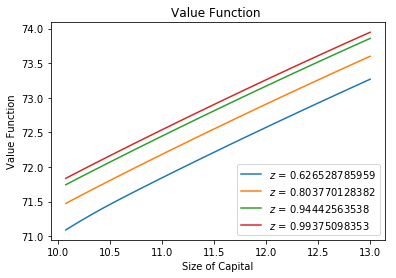

In [9]:
# Plot value function 
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[1:], VF[1:, 0], label='$z$ = ' + str(z_grid[0]))
ax.plot(k_grid[1:], VF[1:, 5], label='$z$ = ' + str(z_grid[5]))
ax.plot(k_grid[1:], VF[1:, 15], label='$z$ = ' + str(z_grid[15]))
ax.plot(k_grid[1:], VF[1:, 19], label='$z$ = ' + str(z_grid[19]))
legend = ax.legend(loc='lower right', shadow=False)
plt.xlabel('Size of Capital')
plt.ylabel('Value Function')
plt.title('Value Function ')
plt.show()

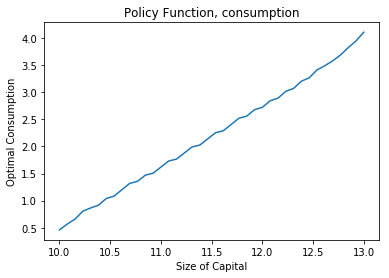

In [10]:
#Plot optimal consumption rule as a function of capital
optK = k_grid[PF]
optC = z_grid * k_grid ** (alpha) + (1 - delta) * k_grid - optK
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optC[:][18], label='Consumption')
plt.xlabel('Size of Capital')
plt.ylabel('Optimal Consumption')
plt.title('Policy Function, consumption')
plt.show()

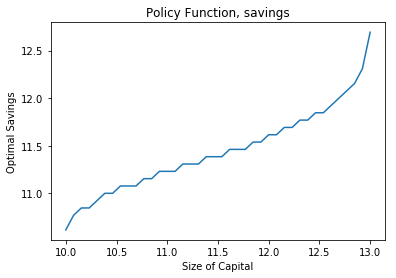

In [11]:
#Plot optimal capital in period t + 1 rule as a function of cake size
optK = k_grid[PF]
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optK[:][18], label='Capital in period t+1')
plt.xlabel('Size of Capital')
plt.ylabel('Optimal Savings')
plt.title('Policy Function, savings')
plt.show()

## Exercise 3

__ 1. Bellman Equation:__ $V(k_t, z_t) = {max}_{c_t}\{U(c_t) + \beta E_{z_{t+1}|z_t} V(k_{t+1},z_{t+1}) \} $

In [90]:
gamma = 0.5
beta = 0.96
delta = 0.05
alpha = 0.4
sigma_v = 0.1
mu = 0
rho = 0.8

In [91]:
'''
------------------------------------------------------------------------
Create Grid for State Space - Capital and Shock
------------------------------------------------------------------------
lb_k      = scalar, lower bound of capital grid
ub_k      = scalar, upper bound of capital grid
size_k    = integer, number of grid points in capital state space
k_grid    = vector, size_k x 1 vector of capital grid points 
------------------------------------------------------------------------
'''
lb_k = 10
ub_k = 13
size_k = 30  # Number of grid points of k
size_z = 30 # Number of grid points of z
k_grid = np.linspace(lb_k, ub_k, size_k)

import ar1_approx as ar1
ln_z_grid, pi = ar1.addacooper(size_z, mu, rho, sigma_v)
z_grid = np.exp(ln_z_grid)
pi_z = np.transpose(pi)

In [92]:
'''
------------------------------------------------------------------------
Create grid of current utility values    
------------------------------------------------------------------------
C        = matrix, current consumption (c=z_tk_t^a - k_t+1 + (1-delta)k_t)
U        = matrix, current period utility value for all possible
           choices of k and k'
------------------------------------------------------------------------
'''

C = np.zeros((size_k, size_k, size_z))
for i in range(size_k): # loop over k_t
    for j in range(size_k): # loop over k_t+1
        for q in range(size_z): #loop over z_t
            C[i, j, q] = z_grid[q]* k_grid[i]**alpha + (1 - delta)*k_grid[i] - k_grid[j]
# replace 0 and negative consumption with a tiny value 
# This is a way to impose non-negativity on cons
C[C<=0] = 1e-15
if gamma == 1:
    U = np.log(C)
else:
    U = (C ** (1 - gamma)) / (1 - gamma)
U[C<0] = -9999999

In [93]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol     = scalar, tolerance required for value function to converge
VFdist    = scalar, distance between last two value functions
VFmaxiter = integer, maximum number of iterations for value function
V         = vector, the value functions at each iteration
Vmat      = matrix, the value for each possible combination of w and w'
Vstore    = matrix, stores V at each iteration 
VFiter    = integer, current iteration number
TV        = vector, the value function after applying the Bellman operator
PF        = vector, indicies of choices of w' for all w 
VF        = vector, the "true" value function
------------------------------------------------------------------------
'''
VFtol = 1e-6 
VFdist = 7.0 
VFmaxiter = 500 
V = np.zeros((size_k, size_z))
Vmat = np.zeros((size_k, size_k, size_z)) 
Vstore = np.zeros((size_k, size_z, VFmaxiter)) 
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:
    print("At iteration:", VFiter, "distance:", VFdist)
    for i in range(size_k):
        for j in range(size_k):
            for q in range(size_z):
                EV = 0
                for qq in range(size_z):
                    EV += pi_z[q, qq]*V[j, qq]
                Vmat[i, j, q] = U[i, j, q] + beta * EV
      
    Vstore[:,:, VFiter] = V.reshape(size_k, size_z,)
    TV = Vmat.max(1) 
    PF = np.argmax(Vmat, axis=1)
    VFdist = (np.absolute(V - TV)).max()
    V = TV
    VFiter += 1 
    


if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V 

At iteration: 1 distance: 7.0
At iteration: 2 distance: 5.05712075743
At iteration: 3 distance: 3.43300139504
At iteration: 4 distance: 3.12296919102
At iteration: 5 distance: 2.89912780117
At iteration: 6 distance: 2.71364920171
At iteration: 7 distance: 2.55109289874
At iteration: 8 distance: 2.40815035784
At iteration: 9 distance: 2.28057531437
At iteration: 10 distance: 2.16536595543
At iteration: 11 distance: 2.06030560544
At iteration: 12 distance: 1.96369309095
At iteration: 13 distance: 1.87420159307
At iteration: 14 distance: 1.79079131305
At iteration: 15 distance: 1.71264042554
At iteration: 16 distance: 1.63909485147
At iteration: 17 distance: 1.56963081334
At iteration: 18 distance: 1.50382440151
At iteration: 19 distance: 1.44132797533
At iteration: 20 distance: 1.38185446206
At iteration: 21 distance: 1.32516454479
At iteration: 22 distance: 1.27105577925
At iteration: 23 distance: 1.21935464112
At iteration: 24 distance: 1.16991047128
At iteration: 25 distance: 1.122590

At iteration: 192 distance: 0.00122637590763
At iteration: 193 distance: 0.00117732087135
At iteration: 194 distance: 0.00113022803649
At iteration: 195 distance: 0.00108501891501
At iteration: 196 distance: 0.00104161815841
At iteration: 197 distance: 0.0009999534321
At iteration: 198 distance: 0.000959955294817
At iteration: 199 distance: 0.000921557083018
At iteration: 200 distance: 0.000884694799709
At iteration: 201 distance: 0.000849307007712
At iteration: 202 distance: 0.000815334727434
At iteration: 203 distance: 0.000782721338339
At iteration: 204 distance: 0.000751412484817
At iteration: 205 distance: 0.000721355985391
At iteration: 206 distance: 0.000692501745959
At iteration: 207 distance: 0.000664801676137
At iteration: 208 distance: 0.000638209609107
At iteration: 209 distance: 0.000612681224737
At iteration: 210 distance: 0.000588173975757
At iteration: 211 distance: 0.000564647016745
At iteration: 212 distance: 0.000542061136059
At iteration: 213 distance: 0.00052037869

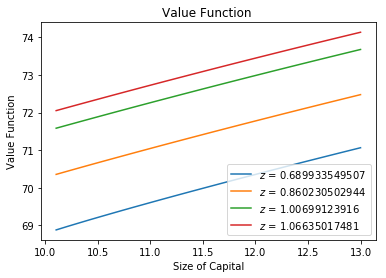

In [94]:
# Plot value function 
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[1:], VF[1:, 0], label='$z$ = ' + str(z_grid[0]))
ax.plot(k_grid[1:], VF[1:, 5], label='$z$ = ' + str(z_grid[5]))
ax.plot(k_grid[1:], VF[1:, 15], label='$z$ = ' + str(z_grid[15]))
ax.plot(k_grid[1:], VF[1:, 19], label='$z$ = ' + str(z_grid[19]))
legend = ax.legend(loc='lower right')
plt.xlabel('Size of Capital')
plt.ylabel('Value Function')
plt.title('Value Function ')
plt.show()

In [17]:
'''
------------------------------------------------------------------------
Find consumption and savings policy functions   
------------------------------------------------------------------------
optW  = vector, the optimal choice of w' for each w
optC  = vector, the optimal choice of c for each c
------------------------------------------------------------------------
'''
optK = k_grid[PF]
optC = z_grid * k_grid ** (alpha) + (1 - delta) * k_grid - optK

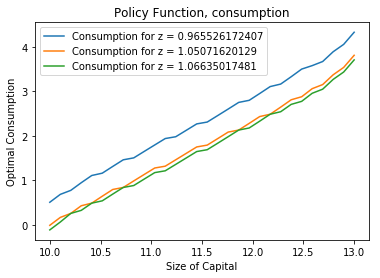

In [25]:
#Plot optimal consumption rule as a function of capital
optK = k_grid[PF]
optC = z_grid * k_grid ** (alpha) + (1 - delta) * k_grid - optK
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optC[:][12], label='Consumption for z = ' + str(z_grid[12]))
ax.plot(k_grid[:], optC[:][18], label='Consumption for z = ' + str(z_grid[18]))
ax.plot(k_grid[:], optC[:][19], label='Consumption for z = ' + str(z_grid[19]))
legend = ax.legend(loc='upper left', shadow=False)
plt.xlabel('Size of Capital')
plt.ylabel('Optimal Consumption')
plt.title('Policy Function, consumption')
plt.show()

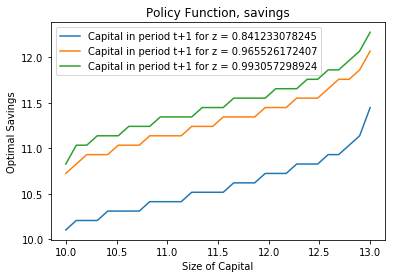

In [27]:
#Plot optimal capital in period t + 1 rule as a function of cake size
optK = k_grid[PF]
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optK[:][4], label='Capital in period t+1 for z = ' + str(z_grid[4]))
ax.plot(k_grid[:], optK[:][12], label='Capital in period t+1 for z = ' + str(z_grid[12]))
ax.plot(k_grid[:], optK[:][14], label='Capital in period t+1 for z = ' + str(z_grid[14]))
legend = ax.legend(loc='upper left', shadow=False)
plt.xlabel('Size of Capital')
plt.ylabel('Optimal Savings')
plt.title('Policy Function, savings')
plt.show()

## Exercise 4

__1. Bellman Equation:__

$ V(w) = {max}\{ V^{U}(w), V^{J}(w \}$

where $ V^{U}(w)= b + \beta EV(w') $
and $ V^{J}(w) = E_0 + \sum_{t=0}^\infty \beta^tw = \frac{w}{1 - \beta} $

In [80]:
beta = 0.96
b = 0.05
mu = 0.0
sigma = 0.15
size_w = 100
rho = 0

In [81]:
# Wage draw prob vector
size_w = 50
sigma_v = 0.15

ln_w_vals, pi_t = ar1.addacooper(size_w, mu, rho, sigma)
w_vals = np.exp(ln_w_vals)
w_probs = np.transpose(pi_t)

w_probs = w_probs[:,1]

In [82]:
size_w = w_probs.shape[0]
VFtol = 1e-2
VFdist = 7.0 
VFmaxiter = 300 
V = np.zeros((size_w)) # initial guess at value function
TV = np.zeros((size_w))
PF_discrete = np.zeros((size_w))
Vmat = np.zeros((size_w, size_w)) # initialize Vmat matrix
Vstore = np.zeros((size_w, VFmaxiter)) #initialize Vstore array
VFiter = 1 

while VFdist > VFtol and VFiter < VFmaxiter:
    print("At iteration:", VFiter, "distance:", VFdist)
    EV = V @ w_probs

    for i in range(size_w): 
        cur_w = w_vals[i]
        U_accept = cur_w / (1-beta) 
        Vwait = b + beta * EV       

        TV[i] = max(U_accept, Vwait)
        PF_discrete[i] = U_accept >= Vwait

    Vstore[:, VFiter] = TV
    VFdist = (np.absolute(V - TV)).max()
    V = TV
    VFiter += 1 

if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')          

break_point = w_vals[ np.argmax(PF_discrete) ]
print("Break even wage offer is: {}".format(break_point))

At iteration: 1 distance: 7.0
At iteration: 2 distance: 35.9457854621
Value function converged after this many iterations: 3
Break even wage offer is: 0.9738879885903856


(0, 45)

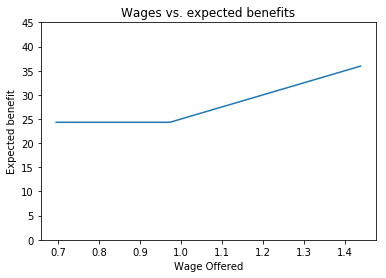

In [83]:
plt.plot(w_vals, V)
plt.xlabel("Wage Offered")
plt.ylabel("Expected benefit")
plt.title("Wages vs. expected benefits")
plt.ylim((0,45))

In [86]:
b_vals = np.linspace(0.5, 1, 20)
break_points = np.empty(b_vals.size)
for i in range(b_vals.size):
    cur_b = b_vals[i]
    size_w = w_probs.shape[0]
    VFtol = 1e-2
    VFdist = 7.0 
    VFmaxiter = 300 
    V = np.zeros((size_w)) # initial guess at value function
    TV = np.zeros((size_w))
    PF_discrete = np.zeros((size_w))
    Vmat = np.zeros((size_w, size_w)) # initialize Vmat matrix
    Vstore = np.zeros((size_w, VFmaxiter)) #initialize Vstore array
    VFiter = 1 

    while VFdist > VFtol and VFiter < VFmaxiter:
        print("At iteration:", VFiter, "distance:", VFdist)
        EV = V @ w_probs

        for j in range(size_w): 
            cur_w = w_vals[i]
            U_accept = cur_w / (1-beta) 
            Vwait = b_vals[i] + beta * EV       

            TV[i] = max(U_accept, Vwait)
            PF_discrete[j] = U_accept >= Vwait

        Vstore[:, VFiter] = TV
        VFdist = (np.absolute(V - TV)).max()
        V = TV
        VFiter += 1 
        break_points[i] = w_vals[ np.argmax(PF_discrete) ]

    if VFiter < VFmaxiter:
        print('Value function converged after this many iterations:', VFiter)
    else:
        print('Value function did not converge')          

At iteration: 1 distance: 7.0
At iteration: 2 distance: 17.3872956722
Value function converged after this many iterations: 3
At iteration: 1 distance: 7.0
At iteration: 2 distance: 18.8348436256
Value function converged after this many iterations: 3
At iteration: 1 distance: 7.0
At iteration: 2 distance: 19.5261948766
Value function converged after this many iterations: 3
At iteration: 1 distance: 7.0
At iteration: 2 distance: 20.0314064994
Value function converged after this many iterations: 3
At iteration: 1 distance: 7.0
At iteration: 2 distance: 20.4428877015
Value function converged after this many iterations: 3
At iteration: 1 distance: 7.0
At iteration: 2 distance: 20.7970195576
Value function converged after this many iterations: 3
At iteration: 1 distance: 7.0
At iteration: 2 distance: 21.1122644991
Value function converged after this many iterations: 3
At iteration: 1 distance: 7.0
At iteration: 2 distance: 21.399404505
Value function converged after this many iterations: 3
A

Text(0.5,1,'Wages vs. expected benefits')

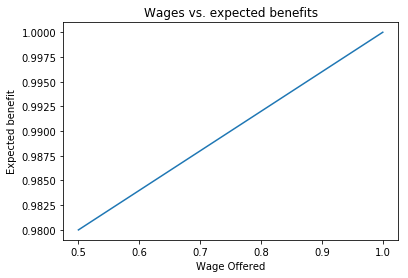

In [87]:
break_points_anal = b_vals * (1-beta) + beta * 1
plt.plot(b_vals, break_points_anal, label='Break Points')
plt.xlabel("Wage Offered")
plt.ylabel("Expected benefit")
plt.title("Wages vs. expected benefits")